<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning NLP Project - Classify Whether Real or Fake News</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-NLP-Classify-Whether-Real-or-Fake-News/blob/SMART_Street/Hyperverse_logo.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section33)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**Data Post-Processing**](#section5)<br>
  - **5.1** [**Data Encoding**](#section51)<br>
  - **5.2** [**Data Preparation**](#section52)<br>
  - **5.3** [**Data Scaling**](#section53)<br>

**6**. [**Model Development & Evaluation**](#section6)<br>
  - **6.1** [**Build the Model**](#section61)<br>
  - **6.2** [**Inspect the Model**](#section62)<br>


<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is a media company.
    - The company offers content to users via news, article, pamphlets etc.
    - They are always working hard to provide users with the best content as possible.
    - Their editing team are always unsure of the sanity of the content so every time when they are publishing new content they always have to track back to the source of the content.

**<h3>Current Scenario:</h3>**

- The current process of identifying legit content requires a lot of manually checking and going through the content again and again which is quite tiresome and tedious.
- Their tech department is utilizing the content which was previously classified as fake to build a dataset for developing a machine learning model to solve the problem of identifying legit and fake contents.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
    - Their editing team have to go through each and every article line by line to check the legitimacy of the content
    - This process is very time-consuming and labour-intensive

- The company has hired you as a data science consultant.

    - They want to automate the process of classifying real and fake article by using text data.


### **Your Role**

- You are given a dataset containing text document with real and fake articles.

- Your task is to build a classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Fake or Real News Prediction.**

- Machine Learning Task: **Text Classification**

- Target Variable: **Label**

### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-NLP-Classify-Whether-Real-or-Fake-News/blob/SMART_Street/Real_or_Fake_News.jpg?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [68]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-xqi968a9
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-xqi968a9


In [69]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression   
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV                    # To tune the models   

In [71]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [72]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


In [73]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains text document with real and fake articles.


| Records | Features|
| :-- | :-- |
| 35918 | 6 |
<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique identifier          |
|02| **title** | The title of the article       |
|03| **Text**   | The text of the article                  |
|04| **subject** | The subject of the article        |
|05| **Date**   | The date at which the article was posted             |
|06| **Label** | Whether the article is true or fake             |


- The **Test dataset** contains text document with real and fake articles and **Label** column value need to be predicted.

| Records | Features |
| :-- | :-- |
| 8980 | 5 | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [75]:
# Load train dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-NLP-Classify-Whether-Real-or-Fake-News/SMART_Street/news_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)
# Get the structure of data
train_df.info()
# Output first 10 data rows
train_df.head(10)


Shape of the Training and Validation dataset: (35918, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35918 entries, 36335 to 15795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   Label    35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


,title,text,subject,date,Label
Id,,,,,
36335,Turkey's Erdogan says U.S. Jerusalem decision ...,ATHENS (Reuters) - Turkish President Tayyip Er...,worldnews,"December 7, 2017",true
12384,BREAKING: Trump Reportedly Considering Ted Cru...,"Ted Cruz would be fair, honest and most of all...",politics,"Nov 15, 2016",fake
24419,Trump chief of staff's Civil War comment spark...,WASHINGTON (Reuters) - White House Chief of St...,politicsNews,"October 31, 2017",true
24740,Saudi Arabia welcomes new U.S. strategy toward...,DUBAI (Reuters) - Saudi Arabia welcomed the ne...,politicsNews,"October 13, 2017",true
27039,Trump arrives in Sicily ahead of Group of Seve...,"SIGONELLA, Italy (Reuters) - U.S. President Do...",politicsNews,"May 25, 2017",true
24163,Acting DHS chief denies White House pressured ...,WASHINGTON (Reuters) - Acting Secretary of Hom...,politicsNews,"November 11, 2017",true
33954,Obama says both left and right are wrong on Wa...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"March 7, 2016",true
3803,BREAKING: Trump’s Top Pick For Secretary Of S...,It has just been announced that Donald Trump a...,News,"November 14, 2016",fake
3566,Eric Trump Just Said Something Monumentally S...,It s no secret that team Trump is all in a tiz...,News,"December 4, 2016",fake


In [76]:
# Check for any missing values
any(train_df.isna().sum())

False

In [77]:
#check if any duplicate row
any(train_df.duplicated())

True

In [78]:
# Load test dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-NLP-Classify-Whether-Real-or-Fake-News/SMART_Street/news_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of Test dataset:', test_df.shape)
# Get the structure of data
test_df.info()
# Output first 10 data rows
test_df.head(10)

Shape of Test dataset: (8980, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980 entries, 22216 to 15236
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8980 non-null   object
 1   text     8980 non-null   object
 2   subject  8980 non-null   object
 3   date     8980 non-null   object
dtypes: object(4)
memory usage: 350.8+ KB


,title,text,subject,date
Id,,,,
22216,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017"
27917,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017"
25007,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017"
1377,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017"
32476,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016"
5766,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016"
16230,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017"
20911,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016"
35838,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017"


In [79]:
# Check for any missing values
any(test_df.isna().sum())

False

In [80]:
#check if any duplicate row
any(test_df.duplicated())

True

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

In [81]:
#Basic statistical details for numeric variables
#train_df.describe(include=[np.float64]).transpose()

**Observations:**
- NA

In [82]:
#Basic statistical details for numeric variables
#train_df.describe(include=[np.int64]).transpose()

**Observations:**
- NA

In [83]:
#Basic statistical details for categorical variables
train_df.describe(include=[object]).transpose()

,count,unique,top,freq
title,35918,31881,Factbox: Trump fills top jobs for his administ...,12
text,35918,31739,,504
subject,35918,8,politicsNews,9060
date,35918,2390,"December 20, 2017",145
Label,35918,2,fake,18748


**Observations:**
- Total count for all categorical variables is same as 35918 which confirms that there are no missing values.

<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

In [84]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35918 entries, 36335 to 15795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   Label    35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


In [85]:
# Columns list can be handy and useful for further steps
train_df.columns

Index(['title', 'text', 'subject', 'date', 'Label'], dtype='object')

In [86]:
# Get list of categorical variables
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['title', 'text', 'subject', 'date', 'Label']


In [87]:
# Get list of numerical variables
s = (train_df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
[]


In [88]:
# Get list of numerical variables
s = (train_df.dtypes == 'int64')
numeric_int_cols = list(s[s].index)

print("Numeric variables Int:")
print(numeric_int_cols)

Numeric variables Int:
[]


<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

                                             |          | [  0%]   00:00 -> (? left)


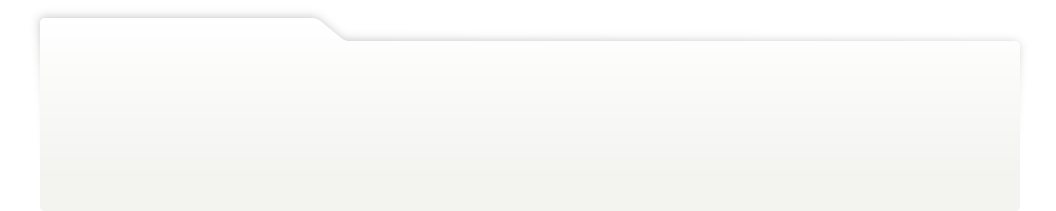
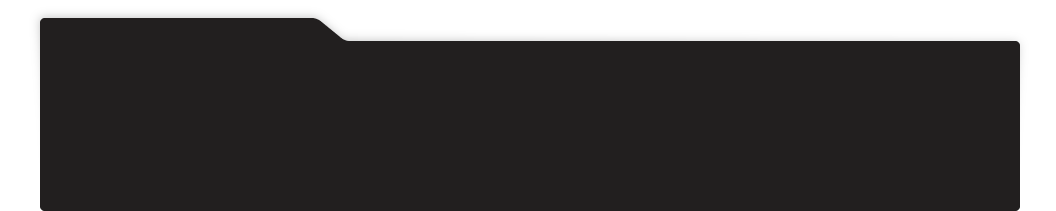
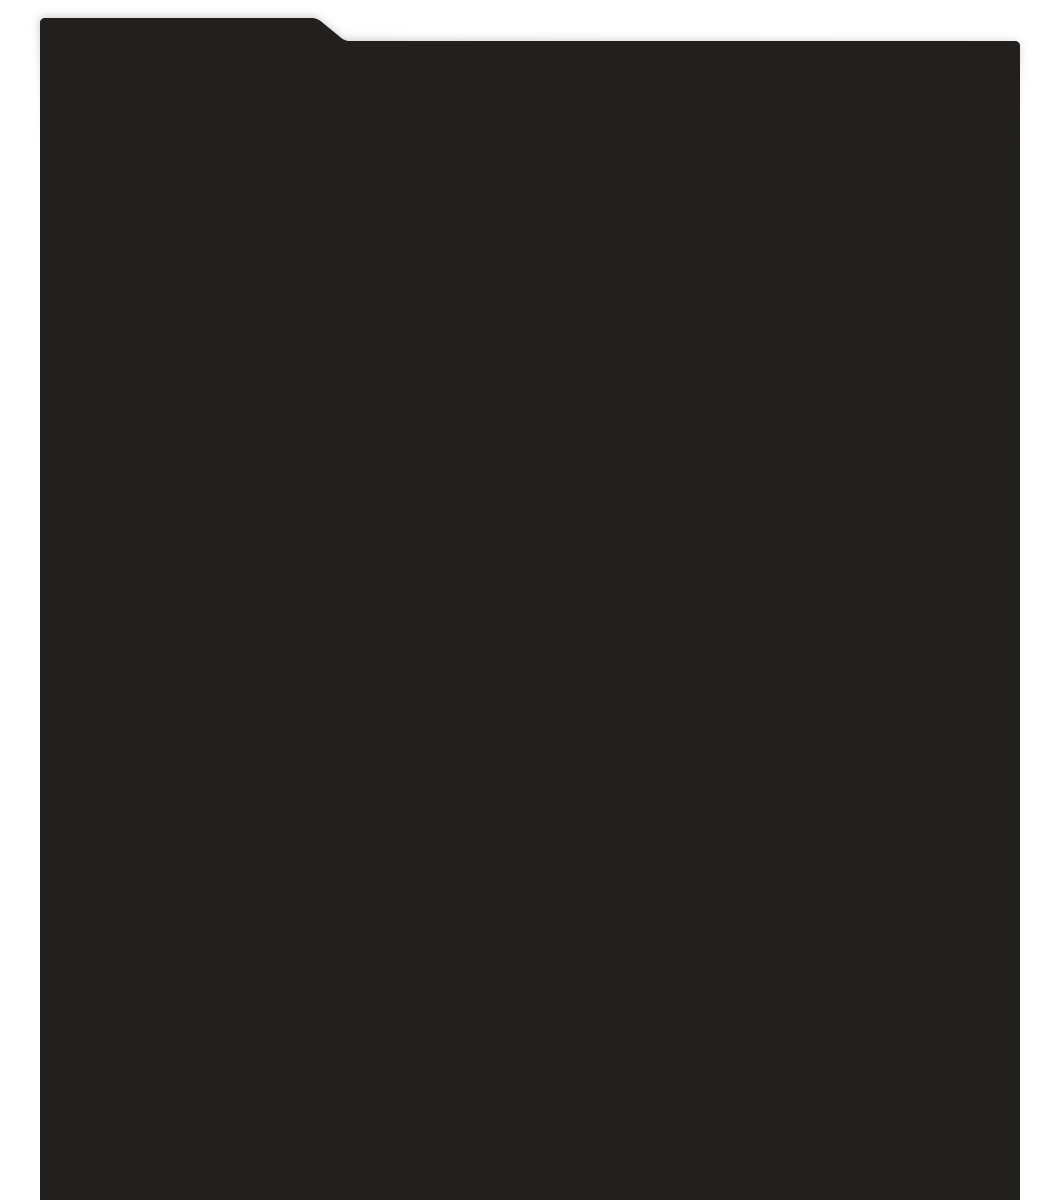
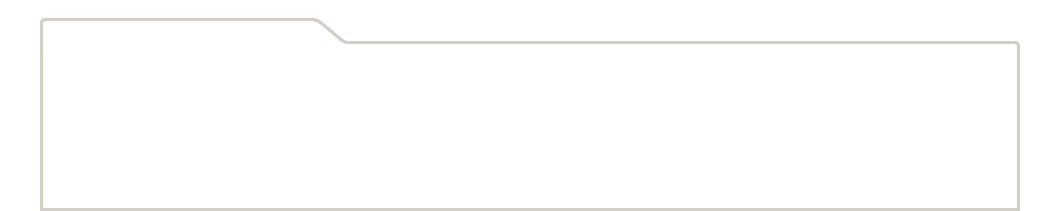
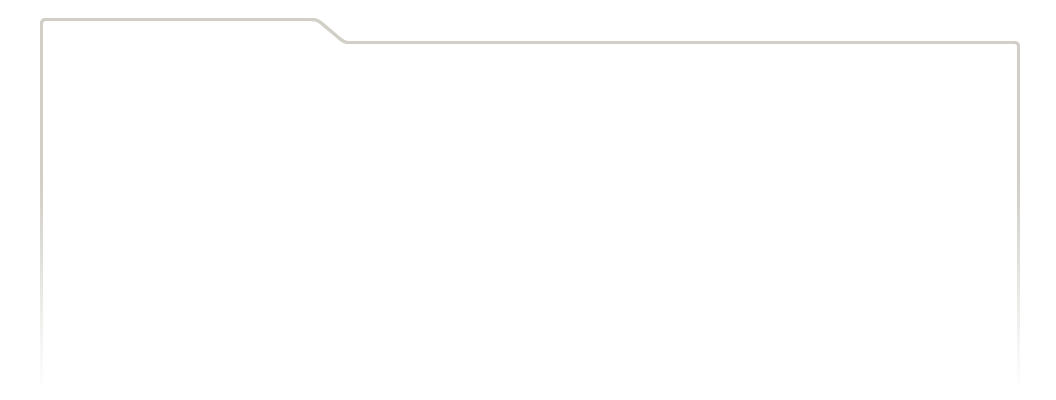
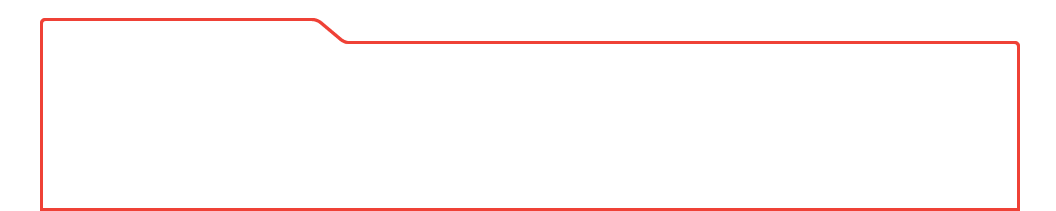
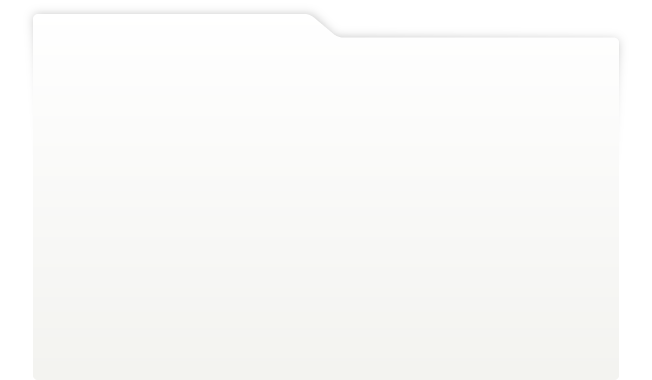
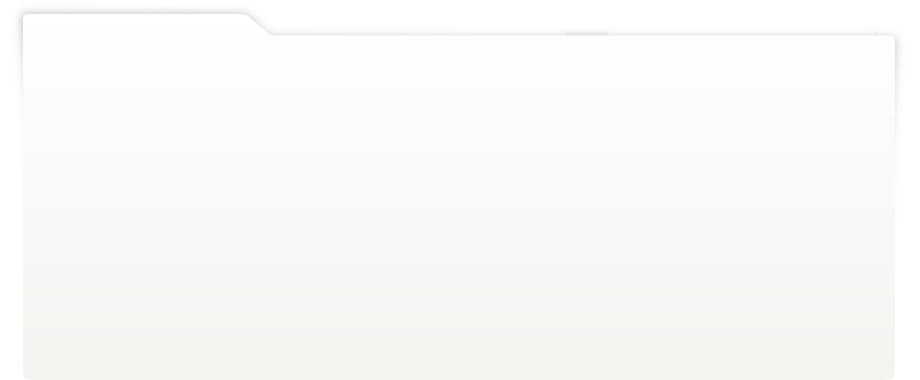
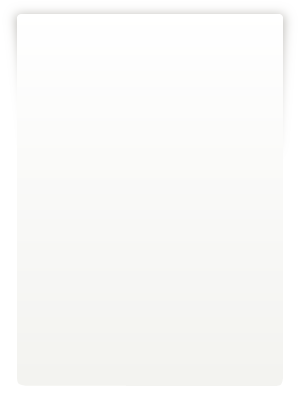
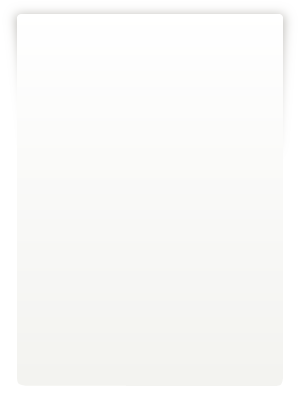
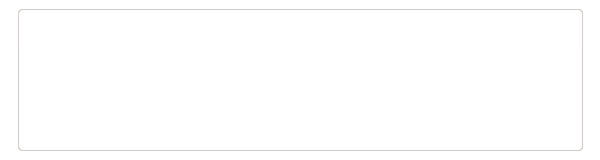
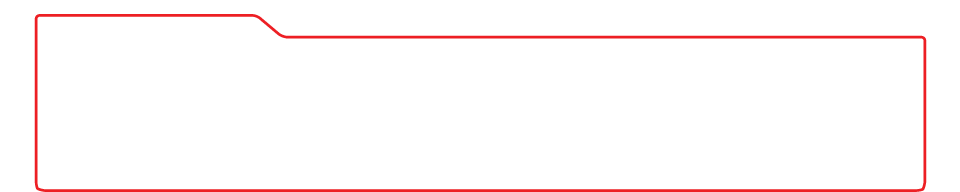
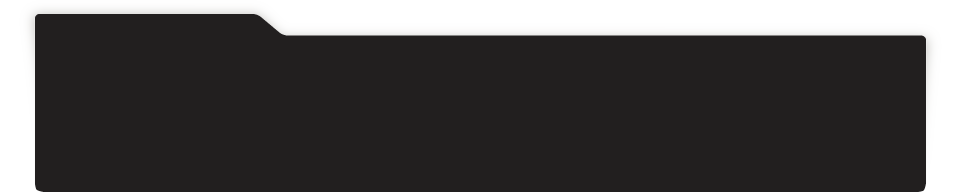
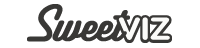
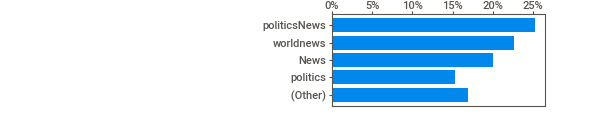
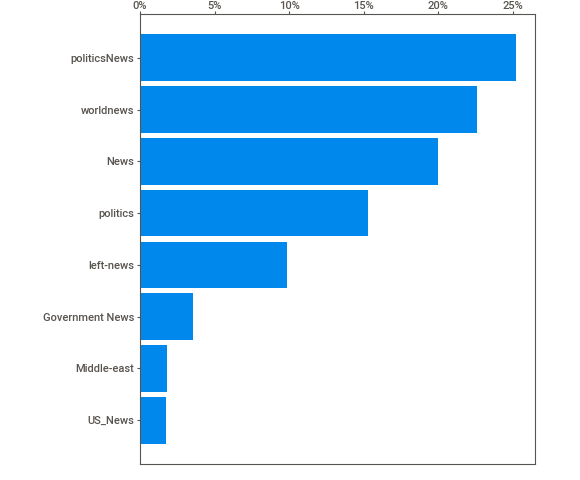
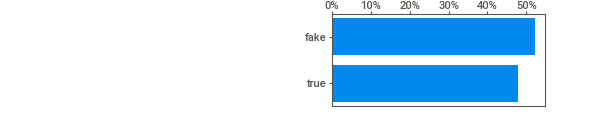
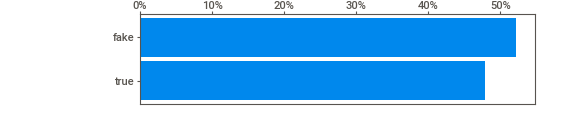
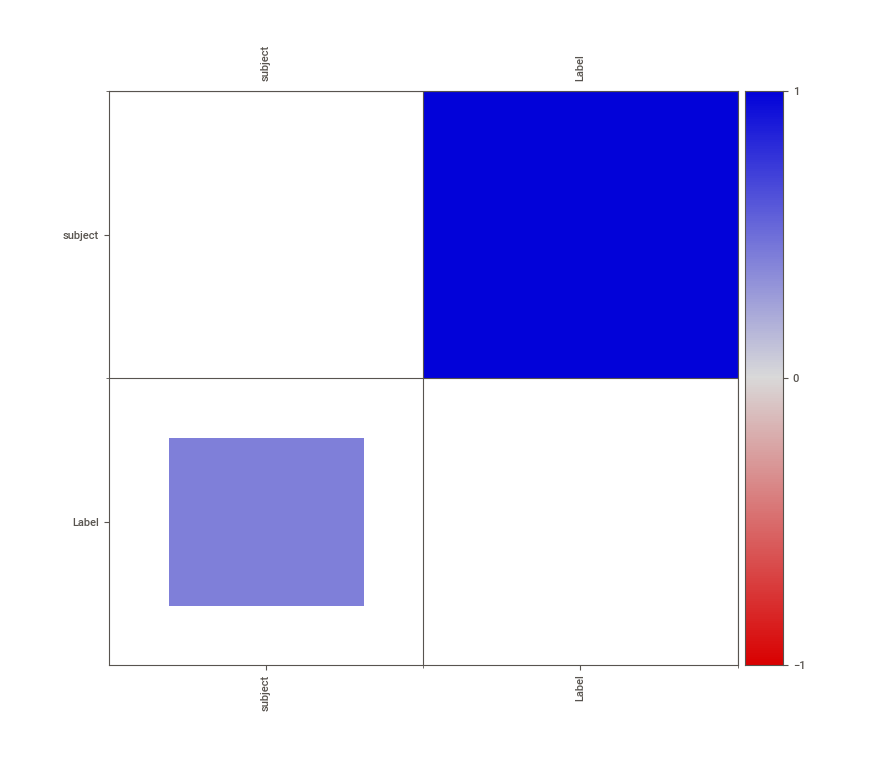
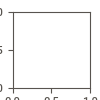

In [89]:
# profile = ProfileReport(df=train_df)
# profile.to_file(output_file='Pre_Profiling_Report.html')
# print('Accomplished!')
import sweetviz as sv
analyze_report = sv.analyze(train_df)
#analyze_report.show_html('train_df_sweetviz_report.html')
analyze_report.show_notebook()

In [90]:
#comparison_report = sv.compare([train_df, "Train"], [test_df, "Test"], "Label")
#comparison_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html
#comparison_report.show_notebook()

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

In [91]:
# display summary of dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35918 entries, 36335 to 15795
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   Label    35918 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

In [92]:
# post_profile=ProfileReport(df=train_df)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

What is the correlation between numeric variables?

In [93]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
# corr = train_df.corr(method='pearson')
# plt.figure(figsize=(15,15))
# sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
# plt.title('Correlation between Numerical features')

**Observations:**

- TBD

What is the relationship between numeric variables?

In [94]:
# plot pairwise relationship in a dataset
# plt.figure(figsize=(50,25))
# sns.pairplot(data=train_df,palette='rainbow',diag_kind='kde')
# plt.show()

**Observations:**

- TBD

In [95]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
train_df.cov()

""


<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

In [96]:
y = train_df['Label']

In [100]:
# Encode for string labels
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [101]:
# Get the news from the text column
sentences = train_df['text'].tolist()
labels = y.tolist()

In [102]:
test_sentences = test_df['text'].tolist()

<a name = section52></a>
### **5.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [103]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

<a name = section53></a>
### **5.3 Data Scaling**

- Using Tokenizer for Training Dataset

In [104]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

For Test Dataset

In [105]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

test_tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
test_tokenizer.fit_on_texts(test_sentences)
test_word_index = test_tokenizer.word_index
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our model.

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [107]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [108]:
%%time
num_epochs = 10
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
898/898 [==============================] - 5s 4ms/step - loss: 0.2863 - accuracy: 0.9157 - val_loss: 0.0921 - val_accuracy: 0.9734
Epoch 2/10
898/898 [==============================] - 3s 4ms/step - loss: 0.0579 - accuracy: 0.9844 - val_loss: 0.0386 - val_accuracy: 0.9891
Epoch 3/10
898/898 [==============================] - 4s 4ms/step - loss: 0.0265 - accuracy: 0.9932 - val_loss: 0.0200 - val_accuracy: 0.9940
Epoch 4/10
898/898 [==============================] - 5s 5ms/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 0.0117 - val_accuracy: 0.9974
Epoch 5/10
898/898 [==============================] - 4s 4ms/step - loss: 0.0094 - accuracy: 0.9978 - val_loss: 0.0090 - val_accuracy: 0.9981
Epoch 6/10
898/898 [==============================] - 4s 4ms/step - loss: 0.0072 - accuracy: 0.9985 - val_loss: 0.0076 - val_accuracy: 0.9985
Epoch 7/10
898/898 [==============================] - 4s 4ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.0075 - val_accuracy: 0.9987
Epoch 

<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


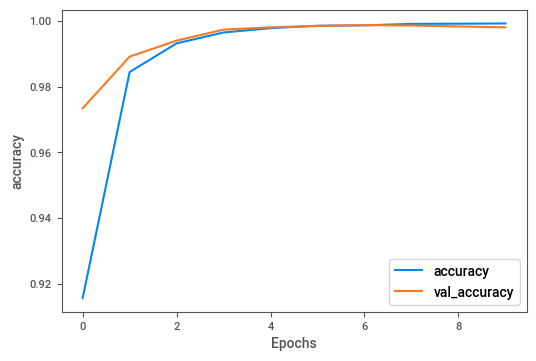

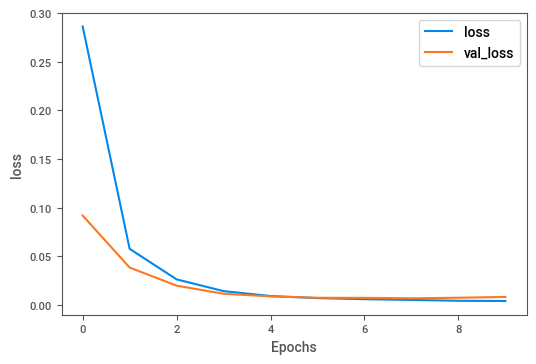

In [110]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [111]:
# prediction on testing validation dataset
y_testing_pred = model.predict(testing_padded).flatten()

In [112]:
float(y_testing_pred[101])

3.4179723940042095e-08

In [113]:
# prediction on test dataset
y_test_pred = model.predict(test_padded).flatten()

In [114]:
float(y_test_pred[100])

1.145512578659691e-05

In [115]:
# convert probabilities into text label
final_prediction = ['fake' if float(prob) <0.9 else 'true' for prob in np.ravel(y_test_pred)]

In [116]:
final_prediction[:10]

['fake',
 'true',
 'true',
 'fake',
 'true',
 'fake',
 'fake',
 'fake',
 'true',
 'true']

In [117]:
output = pd.DataFrame({'Id': test_df.index,'Label': final_prediction})
output.to_csv('RealorFakeNews-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

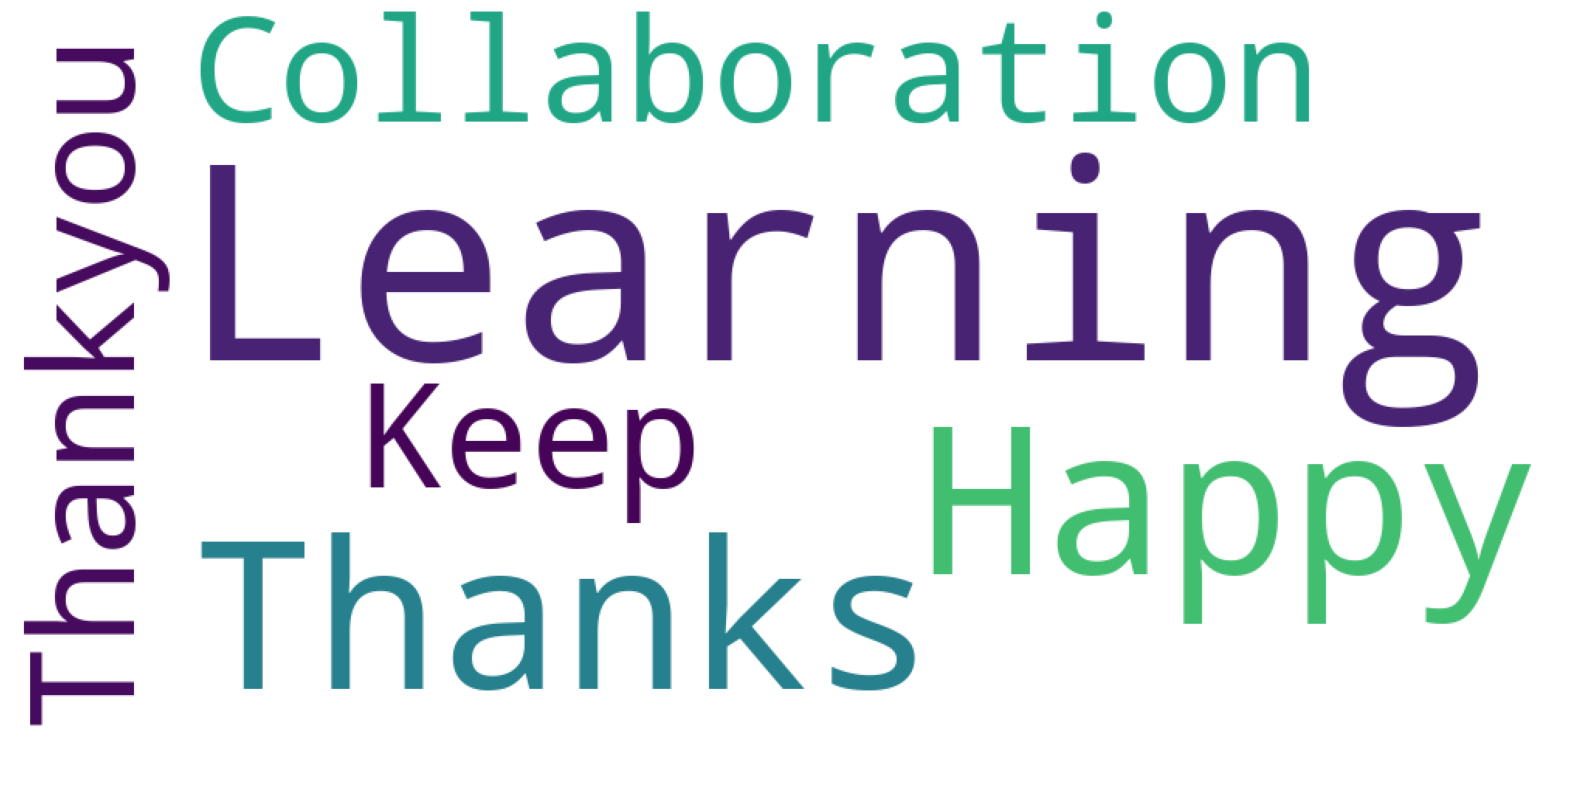

In [118]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()